In [1]:
import os

import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
test_losses_logmel_all = []
test_losses_scatter_all = []
val_losses_logmel_all = []
val_losses_scatter_all = []
val_f1_logmel_all = []
val_f1_scatter_all = []
epoch_logmel_all= []
epoch_scatter_all = []

min_val_loss_scatter = 100000
min_val_loss_logmel = 100000

splits = [0.1, 0.2, 1.0]

max_try = list(set([int(num) for num in os.listdir('/home/laura/thesis/two_inputs/models/')]))[-1]
#tries = [i+1 for i in range(15)]
tries = [i for i in range(1,max_try)]

for num_try in tries:
    test_losses_logmel = []
    test_losses_scatter = []
    val_losses_logmel = []
    val_losses_scatter = []
    val_f1_logmel = []
    val_f1_scatter = []
    epoch_logmel = []
    epoch_scatter = []

    for split in splits:
        filename = '/home/laura/thesis/two_inputs/models/'+str(num_try)+'/logmel_reduced/'+str(int(split*100))+'/model_best.pth.tar'

        checkpoint = torch.load(filename)

        test_losses_logmel.append(checkpoint['test_loss'])
        if min(checkpoint['val_losses']) < min_val_loss_logmel:
            min_val_loss_logmel = min(checkpoint['val_losses'])
            best_model_logmel = checkpoint['f1_instr_test']
            best_logmel_name = filename
            
        #val_losses_logmel.append(min(checkpoint['val_losses']))
        #val_f1_logmel.append(checkpoint['macro_f1_val'])
        epoch_logmel.append(checkpoint['epoch'])
        
        check_losses = torch.load('/home/laura/thesis/two_inputs/models/'+str(num_try)+'/logmel_reduced/'+str(int(split*100))+'/checkpoint.pth.tar')
        if 'val_loss' in check_losses.keys():
            losses_plot = check_losses['val_loss']
        else:
            losses_plot = check_losses['val_losses']

        if checkpoint['epoch']-1 != np.argmin(losses_plot):
            print(checkpoint['epoch']-1)
            print(np.argmin(losses_plot))
            print(filename)
            

    test_losses_logmel_all.append(test_losses_logmel)
    #val_losses_logmel_all.append(val_losses_logmel)
    #val_f1_logmel_all.append(val_f1_logmel)
    epoch_logmel_all.append(epoch_logmel)


    for split in splits:
        filename = '/home/laura/thesis/two_inputs/models/'+str(num_try)+'/9_8_132300_reduced/'+str(int(split*100))+'/model_best.pth.tar'

        checkpoint = torch.load(filename)

        test_losses_scatter.append(checkpoint['test_loss'])
        
        if 'val_loss' in checkpoint.keys():
            if min(checkpoint['val_loss']) < min_val_loss_scatter:
                min_val_loss_scatter = min(checkpoint['val_loss'])
                best_model_scatter = checkpoint['f1_instr_test']
                best_scatter_name = filename
        else:
            if min(checkpoint['val_losses']) < min_val_loss_scatter:
                min_val_loss_scatter = min(checkpoint['val_losses'])
                best_model_scatter = checkpoint['f1_instr_test']
                best_scatter_name = filename
            
        #if 'val_loss' in checkpoint.keys():
        #    val_losses_scatter.append(min(checkpoint['val_loss']))
        #else:
        #    val_losses_scatter.append(min(checkpoint['val_losses']))
        #val_f1_scatter.append(checkpoint['macro_f1_val'])
        epoch_scatter.append(checkpoint['epoch'])

        check_losses = torch.load('/home/laura/thesis/two_inputs/models/'+str(num_try)+'/9_8_132300_reduced/'+str(int(split*100))+'/checkpoint.pth.tar')

        if 'val_loss' in check_losses.keys():
            losses_plot = check_losses['val_loss']
        else:
            losses_plot = check_losses['val_losses']
        
        if checkpoint['epoch']-1 != np.argmin(losses_plot):
            print(checkpoint['epoch']-1)
            print(np.argmin(losses_plot))
            print(filename)
            
    test_losses_scatter_all.append(test_losses_scatter)
    #val_losses_scatter_all.append(val_losses_scatter)
    #val_f1_scatter_all.append(val_f1_scatter)
    epoch_scatter_all.append(epoch_scatter)

In [3]:
max_try

44

In [4]:
import pandas as pd

instruments_code = ['Dr', 'Ba', 'Gt', 'Vo', 'Pn']

table = {}
table['Code'] = instruments_code
table['Logmel'] = best_model_logmel
table['Scatter'] = best_model_scatter

df = pd.DataFrame(table)
df = df.round(3)
print(df)
print(best_logmel_name)
print(best_scatter_name)
#df.to_csv (r'best_instrumentwise.csv', index = False, header=True)

  Code  Logmel  Scatter
0   Dr   0.803    0.923
1   Ba   0.661    0.760
2   Gt   0.663    0.701
3   Vo   0.812    0.832
4   Pn   0.817    0.656
/home/laura/thesis/two_inputs/models/2/logmel_reduced/100/model_best.pth.tar
/home/laura/thesis/two_inputs/models/33/9_8_132300_reduced/100/model_best.pth.tar


In [5]:
import numpy as np

losses_10_logmel = [loss[0] for loss in test_losses_logmel_all if len(loss) == len(splits)]
losses_20_logmel = [loss[1] for loss in test_losses_logmel_all if len(loss) == len(splits)]
losses_100_logmel = [loss[2] for loss in test_losses_logmel_all if len(loss) == len(splits)]

losses_10_scatter = [loss[0] for loss in test_losses_scatter_all if len(loss) == len(splits)]
losses_20_scatter = [loss[1] for loss in test_losses_scatter_all if len(loss) == len(splits)]
losses_100_scatter = [loss[2] for loss in test_losses_scatter_all if len(loss) == len(splits)]

In [6]:
print('things I saved: ', checkpoint.keys())

things I saved:  dict_keys(['epoch', 'weight_updates', 'state_dict', 'train_losses', 'val_losses', 'test_loss', 'f1_instr_val', 'f1_instr_test', 'macro_f1_val', 'split', 'optimizer'])


In [7]:
"""
bins = [(i + 1) / 20 for i in range(20)]
x_ticks = [(i + 1) / 10 for i in range(10)]
f, (ax1, ax3) = plt.subplots(2, 2, figsize=(16,12), sharey=True)

ax2 = ax1[1]
ax1 = ax1[0]
ax4 = ax3[1]
ax3 = ax3[0]

ax1.hist(np.array(losses_20_logmel), bins=bins, edgecolor='k')
ax1.set_xlabel('Test loss logmel')
ax1.set_xticks(x_ticks)
ax1.set_title('20% of the training data')

ax2.hist(np.array(losses_100_logmel), bins=bins, edgecolor='k')
ax2.set_xlabel('Test loss logmel')
ax2.set_xticks(x_ticks)
ax2.set_title('100% of the training data')

ax3.hist(np.array(losses_20_scatter), bins=bins, edgecolor='k')
ax3.set_xlabel('Test loss scatter')
ax3.set_xticks(x_ticks)
ax3.set_title('20% of the training data')

ax4.hist(np.array(losses_100_scatter), bins=bins, edgecolor='k')
ax4.set_xlabel('Test loss scatter')
ax4.set_xticks(x_ticks)
ax4.set_title('100% of the training data')

f.show()
"""

"\nbins = [(i + 1) / 20 for i in range(20)]\nx_ticks = [(i + 1) / 10 for i in range(10)]\nf, (ax1, ax3) = plt.subplots(2, 2, figsize=(16,12), sharey=True)\n\nax2 = ax1[1]\nax1 = ax1[0]\nax4 = ax3[1]\nax3 = ax3[0]\n\nax1.hist(np.array(losses_20_logmel), bins=bins, edgecolor='k')\nax1.set_xlabel('Test loss logmel')\nax1.set_xticks(x_ticks)\nax1.set_title('20% of the training data')\n\nax2.hist(np.array(losses_100_logmel), bins=bins, edgecolor='k')\nax2.set_xlabel('Test loss logmel')\nax2.set_xticks(x_ticks)\nax2.set_title('100% of the training data')\n\nax3.hist(np.array(losses_20_scatter), bins=bins, edgecolor='k')\nax3.set_xlabel('Test loss scatter')\nax3.set_xticks(x_ticks)\nax3.set_title('20% of the training data')\n\nax4.hist(np.array(losses_100_scatter), bins=bins, edgecolor='k')\nax4.set_xlabel('Test loss scatter')\nax4.set_xticks(x_ticks)\nax4.set_title('100% of the training data')\n\nf.show()\n"

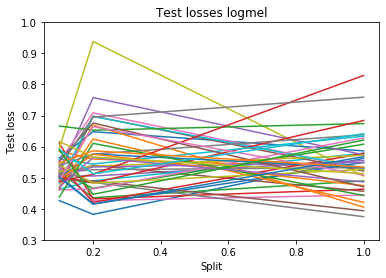

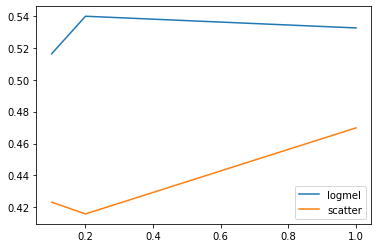

mean [0.52276639 0.55783398 0.54584961]
std [0.04950267 0.11137359 0.09109369]


In [8]:
plt.title('Test losses logmel')

for i in range(len(test_losses_logmel_all)):
    if len(test_losses_logmel_all[i]) == len(splits):
        plt.plot(splits, test_losses_logmel_all[i])

plt.ylabel('Test loss')
plt.xlabel('Split')
plt.yticks([i/10 for i in range(3,11)])
plt.show()

plt.plot(splits, np.median(np.array(test_losses_logmel_all), axis=0), label='logmel')
plt.plot(splits, np.median(np.array(test_losses_scatter_all), axis=0), label='scatter')
plt.legend()
plt.show()

print('mean', np.mean(np.array(test_losses_logmel_all), axis=0))
print('std', np.std(np.array(test_losses_logmel_all), axis=0))

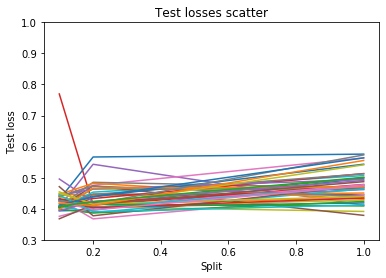

mean [0.42960039 0.43097501 0.47405251]
std [0.05758859 0.04001193 0.04940469]


In [9]:
plt.title('Test losses scatter')
for i in range(len(test_losses_scatter_all)):
    plt.plot(splits, test_losses_scatter_all[i])
# plt.plot(splits, test_losses_logmel_all, label='logmel')
# plt.plot(splits, test_losses_scatter_all, label='scatter')

plt.ylabel('Test loss')
plt.xlabel('Split')
plt.yticks([i/10 for i in range(3,11)])
plt.show()

print('mean', np.mean(np.array(test_losses_scatter_all), axis=0))
print('std', np.std(np.array(test_losses_scatter_all), axis=0))

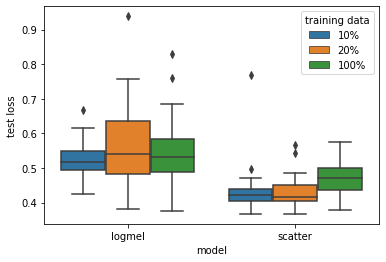

In [10]:
import seaborn as sns
import pandas as pd

data = {}
data["test loss"] = []
data["training data"] = []
data["model"] = []

for i in range(len(losses_10_logmel)):
    data["test loss"].append(losses_10_logmel[i])
    data["training data"].append("10%")
    data["model"].append("logmel")
    
    data["test loss"].append(losses_20_logmel[i])
    data["training data"].append("20%")
    data["model"].append("logmel")
    
    data["test loss"].append(losses_100_logmel[i])
    data["training data"].append("100%")
    data["model"].append("logmel")

    data["test loss"].append(losses_10_scatter[i])
    data["training data"].append("10%")
    data["model"].append("scatter")
    
    data["test loss"].append(losses_20_scatter[i])
    data["training data"].append("20%")
    data["model"].append("scatter")
    
    data["test loss"].append(losses_100_scatter[i])
    data["training data"].append("100%")
    data["model"].append("scatter")

df = pd.DataFrame(data)

sns.boxplot(x="model", y="test loss", hue="training data",data=df)
#plt.savefig('box_plot.pdf')

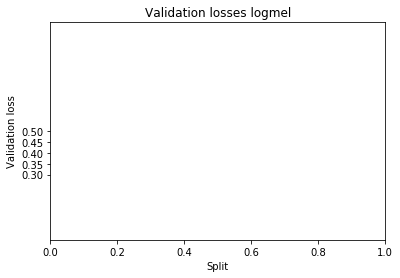

mean nan
std nan


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
plt.title('Validation losses logmel')
for i in range(len(val_losses_logmel_all)):
    plt.plot(splits, val_losses_logmel_all[i])
#plt.plot(splits, val_losses_logmel_all, label='logmel')
# plt.plot(splits, val_losses_scatter_all, label='scatter')

plt.ylabel('Validation loss')
plt.xlabel('Split')
plt.yticks([i/20 for i in range(6,11)])
plt.show()

print('mean', np.mean(np.array(val_losses_logmel_all), axis=0))
print('std', np.std(np.array(val_losses_logmel_all), axis=0))

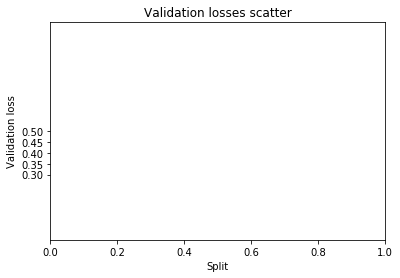

mean nan
std nan


In [12]:
plt.title('Validation losses scatter')
for i in range(len(val_losses_scatter_all)):
    plt.plot(splits, val_losses_scatter_all[i])
#plt.plot(splits, val_losses_logmel_all, label='logmel')
# plt.plot(splits, val_losses_scatter_all, label='scatter')

plt.ylabel('Validation loss')
plt.xlabel('Split')
plt.yticks([i/20 for i in range(6,11)])
plt.show()

print('mean', np.mean(np.array(val_losses_scatter_all), axis=0))
print('std', np.std(np.array(val_losses_scatter_all), axis=0))

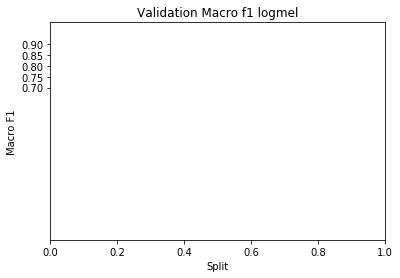

mean nan
std nan


In [13]:
plt.title('Validation Macro f1 logmel')
for i in range(len(val_f1_logmel_all)):
    plt.plot(splits, val_f1_logmel_all[i])
#plt.plot(splits, val_f1_logmel_all, label='logmel')
# plt.plot(splits, val_f1_scatter_all, label='scatter')

plt.ylabel('Macro F1')
plt.xlabel('Split')
plt.yticks([i/20 for i in range(14,19)])
plt.show()

print('mean', np.mean(np.array(val_f1_logmel_all), axis=0))
print('std', np.std(np.array(val_f1_logmel_all), axis=0))

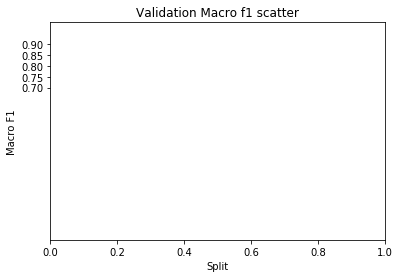

mean nan
std nan


In [14]:
plt.title('Validation Macro f1 scatter')
for i in range(len(val_f1_scatter_all)):
    plt.plot(splits, val_f1_scatter_all[i])
#plt.plot(splits, val_f1_logmel_all, label='logmel')

plt.ylabel('Macro F1')
plt.yticks([i/20 for i in range(14,19)])
plt.xlabel('Split')
plt.show()

print('mean', np.mean(np.array(val_f1_scatter_all), axis=0))
print('std', np.std(np.array(val_f1_scatter_all), axis=0))

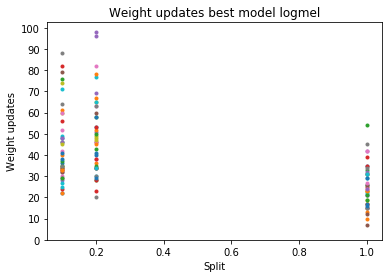

mean [44.44186047 49.62790698 25.51162791]
std [17.33165182 18.37088604  9.83437751]


In [15]:
plt.title('Weight updates best model logmel')
for i in range(len(epoch_logmel_all)):
    plt.plot(splits, epoch_logmel_all[i], '.')
#plt.plot(splits, epoch_logmel_all, label='logmel')
# plt.plot(splits, epoch_scatter_all, label='scatter')

plt.ylabel('Weight updates')
plt.xlabel('Split')
plt.yticks([i*10 for i in range(11)])
plt.show()

print('mean', np.mean(np.array(epoch_logmel_all), axis=0))
print('std', np.std(np.array(epoch_logmel_all), axis=0))

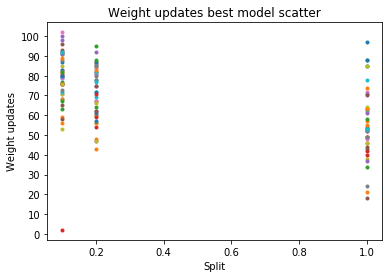

mean [77.48837209 71.3255814  56.41860465]
std [16.64732969 13.48335913 18.09822368]


In [16]:
plt.title('Weight updates best model scatter')
for i in range(len(epoch_scatter_all)):
    plt.plot(splits, epoch_scatter_all[i], '.')
#plt.plot(splits, epoch_logmel_all, label='logmel')
# plt.plot(splits, epoch_scatter_all, label='scatter')

plt.ylabel('Weight updates')
plt.xlabel('Split')
plt.yticks([i*10 for i in range(11)])
plt.show()

print('mean', np.mean(np.array(epoch_scatter_all), axis=0))
print('std', np.std(np.array(epoch_scatter_all), axis=0))